<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/Covid_19%20%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf
import numpy as np

In [ ]:
# Load COVID-19 dataset
def load_dataset():
    train_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_dir = '/content/Covid/test'
    test_dir = '/content/Covid/train'

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, test_generator

train_generator, test_generator = load_dataset()

Found 66 images belonging to 4 classes.
Found 251 images belonging to 4 classes.


In [10]:
import numpy as np

def prep_pixels(train_generator, test_generator):
    # convert from integers to floats
    train_samples = len(train_generator.filenames)
    test_samples = len(test_generator.filenames)

    train_shape = train_generator.image_shape
    test_shape = test_generator.image_shape

    train_data = np.zeros((train_samples, *train_shape), dtype='float32')
    test_data = np.zeros((test_samples, *test_shape), dtype='float32')

    for i in range(train_samples):
        train_data[i] = train_generator.next()[0][0] / 255.0
  
    for i in range(test_samples):
        test_data[i] = test_generator.next()[0][0] / 255.0

    return train_data, test_data

# prepare pixel data
train_norm, test_norm = prep_pixels(train_generator, test_generator)


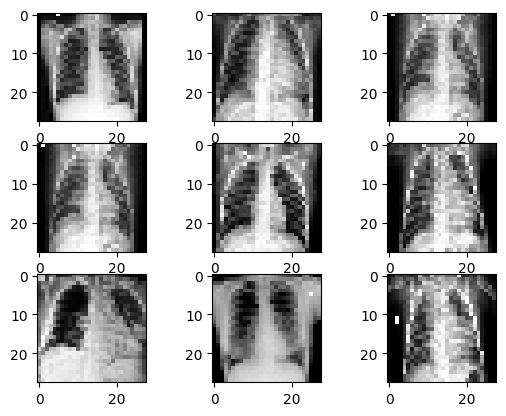

Epoch 1/10
2/2 [==============================] - 1s 268ms/step - loss: 0.6742 - accuracy: 0.1500 - val_loss: 0.5588 - val_accuracy: 0.2667
Epoch 2/10
2/2 [==============================] - 0s 60ms/step - loss: 0.5084 - accuracy: 0.3333 - val_loss: 0.2147 - val_accuracy: 0.2667
Epoch 3/10
2/2 [==============================] - 0s 59ms/step - loss: 0.1359 - accuracy: 0.3333 - val_loss: -0.5165 - val_accuracy: 0.2667
Epoch 4/10
2/2 [==============================] - 0s 65ms/step - loss: -0.7372 - accuracy: 0.3333 - val_loss: -2.3204 - val_accuracy: 0.2667
Epoch 5/10
2/2 [==============================] - 0s 61ms/step - loss: -2.9577 - accuracy: 0.3333 - val_loss: -7.9570 - val_accuracy: 0.2667
Epoch 6/10
2/2 [==============================] - 0s 64ms/step - loss: -10.2491 - accuracy: 0.3333 - val_loss: -36.1868 - val_accuracy: 0.2667
Epoch 7/10
2/2 [==============================] - 0s 56ms/step - loss: -57.3980 - accuracy: 0.3333 - val_loss: -298.2572 - val_accuracy: 0.2667
Epoch 8/10
2

Epoch 1/10
2/2 [==============================] - 1s 268ms/step - loss: 0.6694 - accuracy: 0.2500 - val_loss: 0.5209 - val_accuracy: 0.2000
Epoch 2/10
2/2 [==============================] - 0s 72ms/step - loss: 0.4666 - accuracy: 0.3500 - val_loss: 0.0824 - val_accuracy: 0.2000
Epoch 3/10
2/2 [==============================] - 0s 57ms/step - loss: -0.0095 - accuracy: 0.3500 - val_loss: -0.9579 - val_accuracy: 0.2000
Epoch 4/10
2/2 [==============================] - 0s 61ms/step - loss: -1.1726 - accuracy: 0.3500 - val_loss: -3.7838 - val_accuracy: 0.2000
Epoch 5/10
2/2 [==============================] - 0s 78ms/step - loss: -4.4093 - accuracy: 0.3500 - val_loss: -13.9113 - val_accuracy: 0.2000
Epoch 6/10
2/2 [==============================] - 0s 77ms/step - loss: -17.0267 - accuracy: 0.3500 - val_loss: -74.3780 - val_accuracy: 0.2000
Epoch 7/10
2/2 [==============================] - 0s 58ms/step - loss: -117.2265 - accuracy: 0.3500 - val_loss: -839.1820 - val_accuracy: 0.2000
Epoch 8/1

Epoch 1/10
2/2 [==============================] - 1s 250ms/step - loss: 0.6733 - accuracy: 0.2000 - val_loss: 0.5526 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 0s 72ms/step - loss: 0.5004 - accuracy: 0.3167 - val_loss: 0.1908 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 0s 59ms/step - loss: 0.0957 - accuracy: 0.3167 - val_loss: -0.6039 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 0s 78ms/step - loss: -0.8323 - accuracy: 0.3167 - val_loss: -2.6011 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 0s 74ms/step - loss: -3.2586 - accuracy: 0.3167 - val_loss: -8.9085 - val_accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - 0s 58ms/step - loss: -11.4530 - accuracy: 0.3167 - val_loss: -41.8927 - val_accuracy: 0.3333
Epoch 7/10
2/2 [==============================] - 0s 72ms/step - loss: -67.3729 - accuracy: 0.3167 - val_loss: -371.7942 - val_accuracy: 0.3333
Epoch 8/10
2

Epoch 1/10
2/2 [==============================] - 1s 243ms/step - loss: 0.6737 - accuracy: 0.1500 - val_loss: 0.5814 - val_accuracy: 0.2667
Epoch 2/10
2/2 [==============================] - 0s 63ms/step - loss: 0.5226 - accuracy: 0.3333 - val_loss: 0.3235 - val_accuracy: 0.2667
Epoch 3/10
2/2 [==============================] - 0s 62ms/step - loss: 0.1970 - accuracy: 0.3333 - val_loss: -0.1574 - val_accuracy: 0.2667
Epoch 4/10
2/2 [==============================] - 0s 58ms/step - loss: -0.4567 - accuracy: 0.3333 - val_loss: -1.1978 - val_accuracy: 0.2667
Epoch 5/10
2/2 [==============================] - 0s 56ms/step - loss: -1.9837 - accuracy: 0.3333 - val_loss: -3.9614 - val_accuracy: 0.2667
Epoch 6/10
2/2 [==============================] - 0s 63ms/step - loss: -6.4941 - accuracy: 0.3333 - val_loss: -15.3318 - val_accuracy: 0.2667
Epoch 7/10
2/2 [==============================] - 0s 61ms/step - loss: -29.0235 - accuracy: 0.3333 - val_loss: -100.5985 - val_accuracy: 0.2667
Epoch 8/10
2/

> 26.667
Epoch 1/10
2/2 [==============================] - 1s 252ms/step - loss: 0.6717 - accuracy: 0.1333 - val_loss: 0.5666 - val_accuracy: 0.5333
Epoch 2/10
2/2 [==============================] - 0s 75ms/step - loss: 0.4516 - accuracy: 0.2667 - val_loss: 0.2339 - val_accuracy: 0.5333
Epoch 3/10
2/2 [==============================] - 0s 72ms/step - loss: -0.0507 - accuracy: 0.2667 - val_loss: -0.5586 - val_accuracy: 0.5333
Epoch 4/10
2/2 [==============================] - 0s 74ms/step - loss: -1.4097 - accuracy: 0.2667 - val_loss: -2.6217 - val_accuracy: 0.5333
Epoch 5/10
2/2 [==============================] - 0s 58ms/step - loss: -5.3234 - accuracy: 0.2667 - val_loss: -10.5048 - val_accuracy: 0.5333
Epoch 6/10
2/2 [==============================] - 0s 58ms/step - loss: -23.1280 - accuracy: 0.2667 - val_loss: -66.4512 - val_accuracy: 0.5333
Epoch 7/10
2/2 [==============================] - 0s 84ms/step - loss: -199.5666 - accuracy: 0.2667 - val_loss: -1079.3876 - val_accuracy: 0.5333

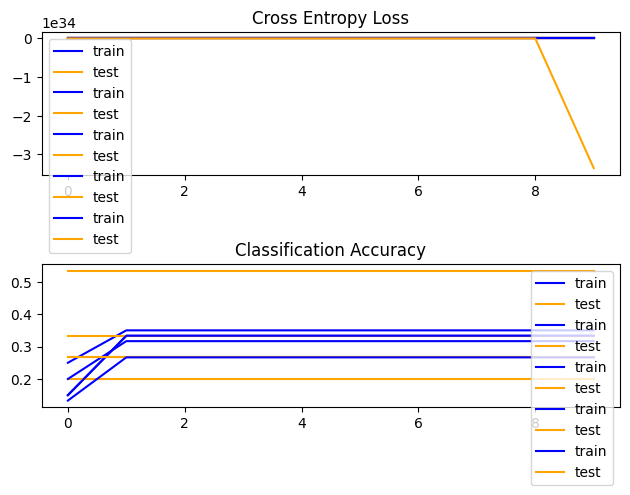

Accuracy: mean=32.000 std=11.470, n=5


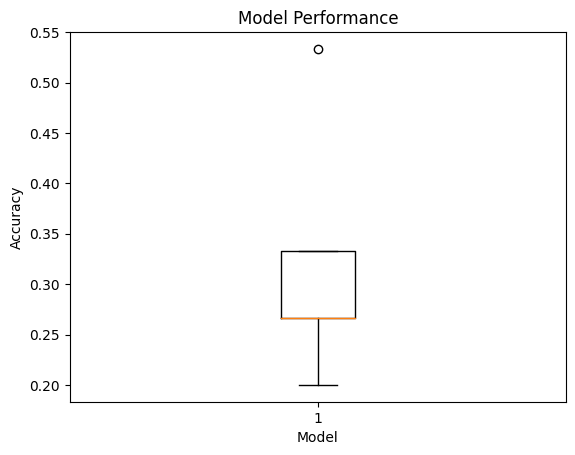

In [28]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation
def train_and_evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # store scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        pyplot.legend()
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.legend()
    pyplot.tight_layout()
    pyplot.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.xlabel('Model')
    pyplot.ylabel('Accuracy')
    pyplot.title('Model Performance')
    pyplot.show()

def data_augmentation(X_train, y_train):
    datagen = ImageDataGenerator()
    # fit parameters from data
    datagen.fit(X_train)
    # configure batch size and retrieve one batch of images
    os.makedirs('images', exist_ok=True)
    for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
        # create a grid of 3x3 images
        for i in range(0, 9):
            pyplot.subplot(330 + 1 + i)
            pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        # show the plot
        pyplot.show()
        break
    return X_batch, y_batch

# run the test harness for evaluating a model
def run_test_harness():
    # data augmentation
    trainX_aug, trainY_aug = data_augmentation(train_norm, train_generator.classes)

    # concatenate original plus synthetic
    trainX_final = np.concatenate((train_norm, trainX_aug), axis=0)
    trainY_final = np.concatenate((train_generator.classes, trainY_aug), axis=0)

    # evaluate model
    scores, histories = train_and_evaluate_model(trainX_final, trainY_final)

    # learning curves
    summarize_diagnostics(histories)

    # summarize estimated performance
    summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

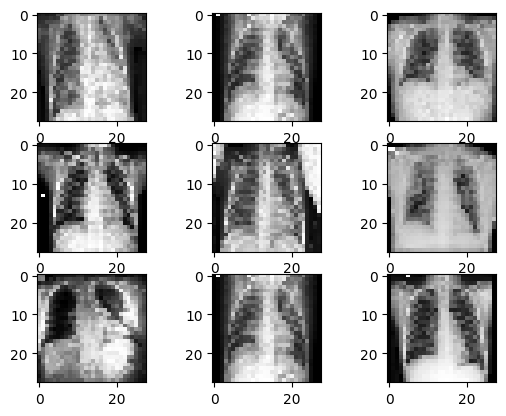

Epoch 1/10
2/2 [==============================] - 1s 273ms/step - loss: 0.6723 - accuracy: 0.1500 - val_loss: 0.5435 - val_accuracy: 0.2667
Epoch 2/10
2/2 [==============================] - 0s 66ms/step - loss: 0.4867 - accuracy: 0.3167 - val_loss: 0.1822 - val_accuracy: 0.2667
Epoch 3/10
2/2 [==============================] - 0s 62ms/step - loss: 0.0735 - accuracy: 0.3167 - val_loss: -0.6223 - val_accuracy: 0.2667
Epoch 4/10
2/2 [==============================] - 0s 75ms/step - loss: -0.9000 - accuracy: 0.3167 - val_loss: -2.7710 - val_accuracy: 0.2667
Epoch 5/10
2/2 [==============================] - 0s 79ms/step - loss: -3.4681 - accuracy: 0.3167 - val_loss: -10.0919 - val_accuracy: 0.2667
Epoch 6/10
2/2 [==============================] - 0s 71ms/step - loss: -14.1575 - accuracy: 0.3167 - val_loss: -49.7889 - val_accuracy: 0.2667
Epoch 7/10
2/2 [==============================] - 0s 82ms/step - loss: -88.3204 - accuracy: 0.3167 - val_loss: -512.4441 - val_accuracy: 0.2667
Epoch 8/10


> 26.667
Epoch 1/10
2/2 [==============================] - 1s 273ms/step - loss: 0.6718 - accuracy: 0.3167 - val_loss: 0.5375 - val_accuracy: 0.1333
Epoch 2/10
2/2 [==============================] - 0s 79ms/step - loss: 0.4972 - accuracy: 0.3500 - val_loss: 0.1623 - val_accuracy: 0.1333
Epoch 3/10
2/2 [==============================] - 0s 133ms/step - loss: 0.1036 - accuracy: 0.3500 - val_loss: -0.6146 - val_accuracy: 0.1333
Epoch 4/10
2/2 [==============================] - 0s 90ms/step - loss: -0.7362 - accuracy: 0.3500 - val_loss: -2.5661 - val_accuracy: 0.1333
Epoch 5/10
2/2 [==============================] - 0s 106ms/step - loss: -2.8330 - accuracy: 0.3500 - val_loss: -8.7130 - val_accuracy: 0.1333
Epoch 6/10
2/2 [==============================] - 0s 104ms/step - loss: -10.1368 - accuracy: 0.3500 - val_loss: -38.6017 - val_accuracy: 0.1333
Epoch 7/10
2/2 [==============================] - 0s 103ms/step - loss: -49.7197 - accuracy: 0.3500 - val_loss: -318.2941 - val_accuracy: 0.1333

Epoch 1/10
2/2 [==============================] - 2s 235ms/step - loss: 0.6759 - accuracy: 0.1333 - val_loss: 0.5572 - val_accuracy: 0.4000
Epoch 2/10
2/2 [==============================] - 0s 75ms/step - loss: 0.5044 - accuracy: 0.2833 - val_loss: 0.2205 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 0s 83ms/step - loss: 0.1174 - accuracy: 0.2833 - val_loss: -0.4957 - val_accuracy: 0.4000
Epoch 4/10
2/2 [==============================] - 0s 64ms/step - loss: -0.7274 - accuracy: 0.2833 - val_loss: -2.3335 - val_accuracy: 0.4000
Epoch 5/10
2/2 [==============================] - 0s 76ms/step - loss: -3.0269 - accuracy: 0.2833 - val_loss: -8.1177 - val_accuracy: 0.4000
Epoch 6/10
2/2 [==============================] - 0s 63ms/step - loss: -11.3570 - accuracy: 0.2833 - val_loss: -37.4740 - val_accuracy: 0.4000
Epoch 7/10
2/2 [==============================] - 0s 75ms/step - loss: -62.6522 - accuracy: 0.2833 - val_loss: -340.4303 - val_accuracy: 0.4000
Epoch 8/10
2

Epoch 1/10
2/2 [==============================] - 1s 261ms/step - loss: 0.6786 - accuracy: 0.1333 - val_loss: 0.5752 - val_accuracy: 0.2667
Epoch 2/10
2/2 [==============================] - 0s 62ms/step - loss: 0.5063 - accuracy: 0.3167 - val_loss: 0.2512 - val_accuracy: 0.2667
Epoch 3/10
2/2 [==============================] - 0s 64ms/step - loss: 0.0795 - accuracy: 0.3167 - val_loss: -0.4354 - val_accuracy: 0.2667
Epoch 4/10
2/2 [==============================] - 0s 74ms/step - loss: -0.8766 - accuracy: 0.3167 - val_loss: -2.1795 - val_accuracy: 0.2667
Epoch 5/10
2/2 [==============================] - 0s 59ms/step - loss: -3.2919 - accuracy: 0.3167 - val_loss: -8.0743 - val_accuracy: 0.2667
Epoch 6/10
2/2 [==============================] - 0s 73ms/step - loss: -13.4083 - accuracy: 0.3167 - val_loss: -39.9997 - val_accuracy: 0.2667
Epoch 7/10
2/2 [==============================] - 0s 79ms/step - loss: -82.6252 - accuracy: 0.3167 - val_loss: -416.8134 - val_accuracy: 0.2667
Epoch 8/10
2

Epoch 1/10
2/2 [==============================] - 1s 256ms/step - loss: 0.6750 - accuracy: 0.1167 - val_loss: 0.5832 - val_accuracy: 0.4667
Epoch 2/10
2/2 [==============================] - 0s 72ms/step - loss: 0.4861 - accuracy: 0.2667 - val_loss: 0.3140 - val_accuracy: 0.4667
Epoch 3/10
2/2 [==============================] - 0s 57ms/step - loss: 0.0837 - accuracy: 0.2667 - val_loss: -0.2392 - val_accuracy: 0.4667
Epoch 4/10
2/2 [==============================] - 0s 65ms/step - loss: -0.8524 - accuracy: 0.2667 - val_loss: -1.5820 - val_accuracy: 0.4667
Epoch 5/10
2/2 [==============================] - 0s 73ms/step - loss: -3.3133 - accuracy: 0.2667 - val_loss: -5.8824 - val_accuracy: 0.4667
Epoch 6/10
2/2 [==============================] - 0s 77ms/step - loss: -13.1003 - accuracy: 0.2667 - val_loss: -29.8625 - val_accuracy: 0.4667
Epoch 7/10
2/2 [==============================] - 0s 64ms/step - loss: -82.5671 - accuracy: 0.2667 - val_loss: -325.3178 - val_accuracy: 0.4667
Epoch 8/10
2

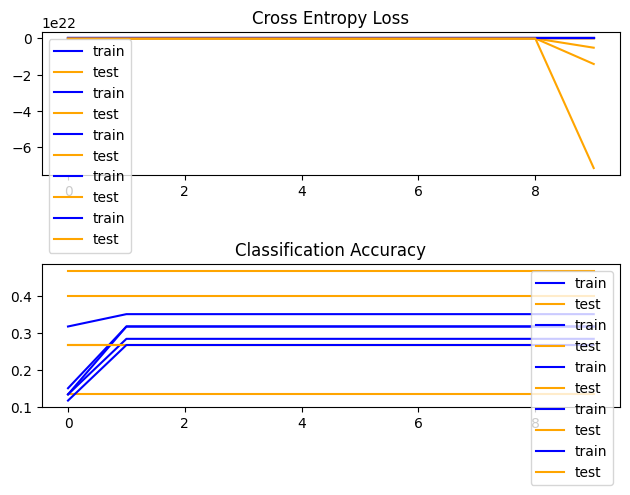

Accuracy: mean=30.667 std=11.624, n=5


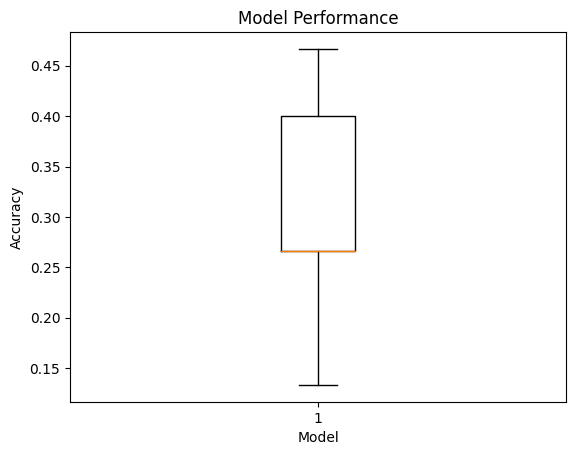

In [44]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def data_augmentation(X_train, y_train):
    datagen = ImageDataGenerator()
    # Fit parameters from data
    datagen.fit(X_train)
    # Configure batch size and retrieve one batch of images
    os.makedirs('images', exist_ok=True)
    for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
        # Create a grid of 3x3 images
        for i in range(0, 9):
            pyplot.subplot(330 + 1 + i)
            pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        # Show the plot
        pyplot.show()
        break
    return X_batch, y_batch

# Evaluate a model using k-fold cross-validation
def train_and_evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Prepare cross-validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # Define model
        model = define_model()
        # Select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
        # Evaluate model
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # Store scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# Plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # Plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        pyplot.legend()
        # Plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.legend()
    pyplot.tight_layout()
    pyplot.show()

# Summarize model performance
def summarize_performance(scores):
    # Print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.xlabel('Model')
    pyplot.ylabel('Accuracy')
    pyplot.title('Model Performance')
    pyplot.show()

# Run the test harness for evaluating a model
def run_test_harness():
    # Data augmentation
    trainX_aug, trainY_aug = data_augmentation(train_norm, train_generator.classes)

    # Concatenate original plus synthetic
    trainX_final = np.concatenate((train_norm, trainX_aug), axis=0)
    trainY_final = np.concatenate((train_generator.classes, trainY_aug), axis=0)

    # Evaluate model
    scores, histories = train_and_evaluate_model(trainX_final, trainY_final)

    # Learning curves
    summarize_diagnostics(histories)

    # Summarize estimated performance
    summarize_performance(scores)

# Entry point, run the test harness
run_test_harness()